In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


### Importing Libraries and Loading Data

In this code snippet, we are performing the initial steps of any data analysis task:

#### Importing Libraries

We import two important libraries for data visualization:

- `seaborn`: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- `matplotlib.pyplot`: Pyplot is a collection of functions in the popular visualization package Matplotlib. Its functions manipulate elements of a figure, such as creating a figure, creating a plotting area, plotting lines, adding plot labels, etc.



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
train_df = pd.read_csv(train_file_path)
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_df = pd.read_csv(test_file_path)
print(f"Full train dataset shape is {train_df.shape}")
print(f"Full test dataset shape is {test_df.shape}")

Full train dataset shape is (1460, 81)
Full test dataset shape is (1459, 80)


### Displaying the First Few Rows of the Test Dataset

Here we are displaying the first few rows of the test dataset to get a quick overview of the data. Has we could expect, the target variable it's not part of it. 

In [3]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Saving the IDs of the Training and Test Sets

Here we are saving the IDs of the training and test sets into variables `train_ID` and `test_ID`, respectively since we don't need them for EDA.


- We extract the 'Id' column from both the training and test DataFrames and store them in separate variables.
- Next, we remove the 'Id' column from both the training and test DataFrames using the `drop()` function along the column axis (`axis=1`).

Here's a brief overview of the steps:
1. Save the IDs of the training and test sets.
2. Remove the 'Id' column from both datasets.

Finally, we display the first 3 rows of the training dataset using the `head()` function to inspect its structure.


In [4]:
# Salvar os IDs dos conjuntos de treinamento e teste
train_ID = train_df['Id']
test_ID = test_df['Id']

# Remover a coluna 'Id' do conjunto de treinamento e teste
train_df = train_df.drop("Id", axis=1)
test_df = test_df.drop("Id", axis=1)

# Exibir as primeiras linhas do conjunto de treinamento e teste
train_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### Separating Target and Features in the Training Set

In this code snippet, we perform the following tasks:

1. Extract the target variable 'SalePrice' from the training DataFrame and assign it to the variable `target`.
2. Create a DataFrame `train_features` containing the training features by dropping the 'SalePrice' column from the original training DataFrame.
3. Create a copy of the test features DataFrame and assign it to the variable `test_features`.
4. Concatenate the training and test features DataFrames along the row axis (axis=0) to create a combined DataFrame `train_test`.
Concatenating Training and Test Features (train_test):

Concatenating the training and test features allows us to perform preprocessing steps, such as handling missing values, encoding categorical variables, and scaling features, on the combined dataset.
This ensures that preprocessing steps are applied consistently to both the training and test datasets, avoiding discrepancies during model training and evaluation.

The shape of the combined DataFrame `train_test` is displayed to verify the dimensions of the merged dataset.


In [5]:
# Separar o alvo e as características do conjunto de treinamento
target = train_df['SalePrice']
train_features = train_df.drop(['SalePrice'], axis=1)

test_features = test_df.copy()

# Concatenar os conjuntos de treinamento e teste
train_test = pd.concat([train_features, test_features], axis=0, sort=False)

train_test.shape

(2919, 79)

### Dataset Information

In this code snippet, we are accessing information about the combined dataset `train_test` using the `.info()` method.

The `.info()` method provides a concise summary of the DataFrame, including the total number of entries, column names, data types, and memory usage. It is a useful method to quickly understand the structure and characteristics of the dataset.

By executing `train_test.info()`, we can obtain details about the dataset's columns, their data types, and the presence of missing values, allowing us to further analyze and preprocess the data.


In [6]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

### Memory Usage Information

The memory usage information provided indicates the memory footprint of the DataFrame `train_test`. Here are some key points to understand:

- **Memory Usage**: The memory usage reflects the amount of memory (in bytes) consumed by the DataFrame to store the data.
  
- **Total Memory Usage**: The total memory usage of the DataFrame is reported as 1.8+ MB, indicating that the DataFrame occupies approximately 1.8 megabytes of memory.

- **Data Types**: The DataFrame contains columns with different data types:
  - 11 columns are of type `float64`.
  - 25 columns are of type `int64`.
  - 43 columns are of type `object`.

The data types of columns determine how the data is stored in memory and influence the memory usage of the DataFrame.

### Non-Null Count

The snippet also shows information about the non-null count for specific columns. Here's what it means:

- **Non-Null Count**: The non-null count indicates the number of non-null (non-missing) values present in each column of the DataFrame.

- For example, the `ScreenPorch` column has 2919 non-null values, meaning there are 2919 valid entries in that column.
- Similarly, the `PoolArea` column also has 2919 non-null values, indicating 2919 valid entries for pool area measurements.
- On the other hand, the `PoolQC` column has only 10 non-null values, suggesting that there are only 10 entries with non-null values for pool quality.
- Similarly, the `Fence` column has 571 non-null values, indicating 571 valid entries for fence types.

Understanding the non-null count helps assess data completeness and identify missing values in the dataset.


### Missing Values Summary

The output `train_test.isnull().sum()` provides a summary of the missing values in the DataFrame `train_test`. Here's the breakdown:

- **Total Missing Values**: The output shows the total number of missing values for each column in the DataFrame.
- By calling `.isnull()` on the DataFrame and then using `.sum()`, we obtain the sum of missing values for each column.

For example, if a column has a value of 0, it means that there are no missing values in that column. Conversely, if a column has a value greater than 0, it indicates the number of missing values present in that column.

This summary helps in identifying which columns contain missing data and enables further investigation or handling of missing values during data preprocessing.


In [7]:
train_test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

### Visualization of Missing Values

In this code snippet, we use Seaborn and Matplotlib libraries to create a heatmap visualization of missing values in the DataFrame `train_test`.

- We set the figure size to (12, 6) using `plt.figure(figsize=(12, 6))`.
- The `sns.heatmap()` function is used to create a heatmap where missing values are represented by True (1) and non-missing values are represented by False (0).
- The parameter `cbar=False` removes the color bar from the heatmap.
- We set the colormap to "viridis" using `cmap="viridis"`.
- The title of the heatmap is set to "Missing Values" with `plt.title("Missing Values")`.
- Finally, `plt.show()` is called to display the heatmap.

This visualization allows us to quickly identify the pattern of missing values across different columns in the dataset, helping us to make decisions about how to handle missing data during data preprocessing.


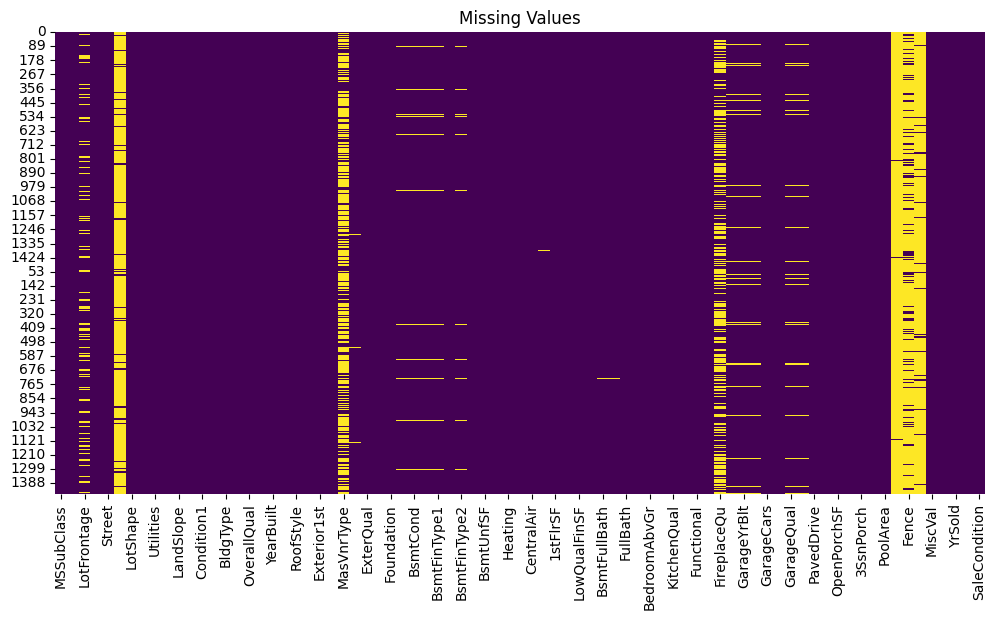

In [8]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(train_test.isnull(), cbar = False, cmap="viridis")
plt.title("Missing Values")
plt.show()

### Calculating Percentage of Missing Values for Each Variable

In this code snippet, we perform the following tasks:

1. Calculate the percentage of missing values for each variable in the combined dataset `train_test`.
2. Create a DataFrame `missing_info` containing two columns:
   - 'Variable': Contains the names of variables with missing values.
   - 'Percentage of Missing Values': Contains the corresponding percentage of missing values for each variable.
3. Filter the rows in `missing_info` where the percentage of missing values is greater than 90%.
4. Sort the DataFrame `missing_info` by the percentage of missing values in ascending order.

The resulting DataFrame `missing_info` displays variables with missing values where the percentage of missing values exceeds 90%, providing insights into the extent of missing data in the dataset.


In [9]:
# Calcular a porcentagem de valores ausentes em cada variável
missing_percentage = (train_test.isnull().sum() / len(train_test)) * 100

# Criar um DataFrame com as informações
missing_info = pd.DataFrame({
    'Variável': missing_percentage.index,
    'Porcentagem de Valores Ausentes': missing_percentage.values
})

# Filtrar as linhas onde a porcentagem de valores ausentes é maior que 90%
missing_info = missing_info[missing_info['Porcentagem de Valores Ausentes'] > 90]

# Mostrar o DataFrame ordenado pela porcentagem de valores ausentes
missing_info = missing_info.sort_values(by='Porcentagem de Valores Ausentes')
pd.set_option('display.max_rows', None)
print(missing_info)

       Variável  Porcentagem de Valores Ausentes
5         Alley                        93.216855
73  MiscFeature                        96.402878
71       PoolQC                        99.657417


### Removing Variables from the Dataset

In this code snippet, we perform the following tasks:

1. Define a list `remove_from_dataset` containing the names of variables to be removed from the dataset. These variables are 'Alley', 'MiscFeature', and 'PoolQC'.
2. Remove the specified variables from the dataset `train_test` using the `drop()` function along the column axis (axis=1).

The rationale behind removing these variables may include:
- **'Alley'**: This variable represents the type of alley access to the property. Since a large portion of the data is missing (NaN values), and alley type may not significantly influence house prices, it is reasonable to remove this variable.
- **'MiscFeature'**: This variable refers to miscellaneous feature not covered in other categories. Again, a significant number of missing values and potential low impact on house prices justify its removal.
- **'PoolQC'**: This variable denotes the quality of the pool, but a considerable number of properties do not have pools, resulting in many missing values. Additionally, the presence or quality of a pool may not be a crucial determinant of house prices for all properties.

After removing these variables, the first three rows of the dataset `train_test` are displayed to verify the changes.


In [10]:
# Lista de variáveis a serem removidas do conjunto de dados
remove_from_dataset = ['Alley', 'MiscFeature', 'PoolQC']

# Remover as variáveis do conjunto de dados
train_test = train_test.drop(remove_from_dataset, axis=1)

# Exibir as primeiras linhas do conjunto de dados após a remoção
train_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,9,2008,WD,Normal


### Verification of Removed Columns

In this code snippet, we verify whether the specified columns have been successfully removed from the dataset. Here's a breakdown of the code:

- We define a list called `removed_columns` containing the names of columns that were intended to be removed from the dataset.
- The `if` statement checks if all columns in the `removed_columns` list are not present in the `train_test` dataset columns.
- If all columns are indeed not present, it prints the message "Columns have been removed successfully".
- Otherwise, if any of the columns are still present in the dataset, it prints the message "Columns are still present on the dataset".

This verification step ensures that the specified columns have been properly removed from the dataset as intended.


In [11]:
removed_columns = ['Alley', 'MiscFeature', 'PoolQC']

if all(column not in train_test.columns for column in removed_columns):
    print("Columns have been removed sucessfully")
else:
    print("Columns are still present on the dataset")

Columns have been removed sucessfully


### Summary Statistics of Dataset

The `describe()` method provides summary statistics of the dataset `train_test`, including:

- **Count**: Number of non-null values in each column.
- **Mean**: Average value of each column.
- **Std**: Standard deviation, which measures the dispersion of values around the mean.
- **Min**: Minimum value observed in each column.
- **25%**: 25th percentile, also known as the first quartile, indicating the value below which 25% of the observations fall.
- **50%**: Median or 50th percentile, representing the middle value of the dataset.
- **75%**: 75th percentile, or the third quartile, indicating the value below which 75% of the observations fall.
- **Max**: Maximum value observed in each column.

The summary statistics help to understand the distribution and range of values in each numerical variable of the dataset, providing insights into central tendency, spread, and the presence of outliers.


In [12]:
train_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Lets Examinante each datatype

### Identification of Numerical and Categorical Columns

Here we identify the numerical and categorical columns in the dataset `train_test` using the `select_dtypes()` method from pandas.

#### Numerical Columns:
The numerical columns represent features with numeric values. These columns are essential for numerical analysis and modeling. Here are the numerical columns identified:
- MSSubClass
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- ...
- YrSold

#### Categorical Variables:
Categorical variables represent features with non-numeric values, typically representing categories or labels. These columns are crucial for categorical analysis and encoding before modeling. Here are the categorical variables identified:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- ...
- SaleType

Understanding the types of variables in the dataset helps in choosing appropriate data preprocessing techniques and modeling strategies.



In [13]:
numeric_columns = train_test.select_dtypes(include = np.number).columns
categorical_columns = train_test.select_dtypes(include = 'object').columns

print("Numerical columns")
print(numeric_columns)


print("Categorical variables")
print(categorical_columns)

Numerical columns
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Categorical variables
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       

### Handling Missing Values in the Dataset

Here we handle missing values in the dataset `train_test` using various strategies tailored to different types of features.

#### Numeric Columns:
- We use `SimpleImputer` from scikit-learn to fill missing values in numeric columns with the mean value of each respective column.

#### Categorical Columns:
- For specific categorical columns where 'NA' implies 'None' or 'No', we fill missing values with the string 'None'.
- For specific numeric columns where 'NA' implies 'No', we fill missing values with 0.
- For specific categorical columns, we fill missing values with their mode (most frequent value).
- For the 'Functional' column, we fill missing values with 'Typ'.
- For the 'MSZoning' column, we fill missing values with the mode of each group defined by 'MSSubClass'.
- For the 'LotFrontage' column, we fill missing values with the median of each group defined by 'Neighborhood'.

The code iterates through the categorical columns to fill missing values with the most frequent value using `SimpleImputer` with the strategy 'most_frequent'.

These steps ensure that the dataset is properly preprocessed and ready for further analysis and modeling.


In [14]:
from sklearn.impute import SimpleImputer

#Lets Define a function to fill the missing values 
def fill_missing(df, cols, value):
    for col in cols:
        df[col].fillna(value, inplace=True)
        
#Lets create an imputer for numeric Values and apply it
numeric_imputer = SimpleImputer(strategy = 'mean')
train_test[numeric_columns] = numeric_imputer.fit_transform(train_test[numeric_columns])

#For specific categorical columns where 'NA' means None or 'No' fill with 'None'

none_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
             'FireplaceQu', 'Fence']

fill_missing(train_test, none_cols, 'None')

#For specific numeric columns where 'NA' means 'No', fill with 0

zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars']

fill_missing(train_test, zero_cols, 0)

#For specific categorial columns, fill with their mode

mode_cols = ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_cols:
    train_test[col] = train_test[col].fillna(train_test[col].mode()[0])
    
#For 'Functional' column fill with 'Typ'
train_test['Functional'] = train_test['Functional'].fillna('Typ')

# For 'MSZoning' column, fill with the mode of each group defined by 'MSSubClass'
train_test['MSZoning'] = train_test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'None'))

#For lotfrontage column, fill with the median of each group defined by Neighborhood
train_test['LotFrontage'] = train_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#For the remaining categorical columns we can fill with the mode

remaining_cols = [col for col in categorical_columns if col not in none_cols + mode_cols]
mode_imputer = SimpleImputer(strategy = 'most_frequent')
train_test[remaining_cols] = mode_imputer.fit_transform(train_test[remaining_cols])

train_test.head(2)
 


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,None,0.0,2.0,2008.0,WD,Normal
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,None,0.0,5.0,2007.0,WD,Normal


### Converting Numeric Columns to String

In this code snippet, we convert selected numeric columns to string type in the DataFrame `train_test`.

#### Purpose:
- Certain numeric columns, such as 'MSSubClass', 'YrSold', and 'MoSold', represent categorical variables rather than continuous numerical values. These columns contain numerical codes representing categories or labels.
- By converting these columns to string type, we ensure that these numerical codes are treated as categorical labels during analysis and modeling.

#### Method:
- We define a function `convert_to_string` that takes a DataFrame `df` and a list of column names `cols` as input.
- Within the function, we iterate through each column specified in the `cols` list and convert its data type to string using the `astype()` method.
- The function returns the modified DataFrame with the specified columns converted to string type.

#### Importance:
- Converting numeric columns representing categorical variables to string type helps prevent misinterpretation by analytical algorithms.
- It ensures that these columns are treated as categorical variables during data analysis, feature engineering, and model training, thereby preserving the integrity and accuracy of the dataset.


In [15]:
def convert_to_string(df, cols):
    for col in cols:
        df[col] = df[col].astype(str)
    return df


numeric_to_string_cols = ['MSSubClass','YrSold', 'MoSold']

train_test = convert_to_string(train_test,numeric_to_string_cols )

### Checking for Missing Values

In this code snippet, we check for missing values in the DataFrame `train_test`.

#### Purpose:
- The presence of missing values can adversely affect the integrity and accuracy of the dataset, potentially leading to biased analysis and modeling results.
- By identifying missing values, we can take appropriate actions such as imputation or removal to address them effectively.

#### Method:
- We calculate the sum of missing values for each column in the DataFrame using the `isnull().sum()` method.
- If the total number of missing values is greater than 0:
  - We print the columns along with their respective counts of missing values using boolean indexing (`missing_values[missing_values > 0]`).
- If no missing values are found:
  - We print a message indicating that no missing values were detected, followed by displaying the first few rows of the DataFrame for inspection (`train_test.head()`).

#### Output Interpretation:
- If missing values are present, the output will display the columns with their corresponding counts of missing values.
- If no missing values are found, the output will indicate that no missing values were detected and display the initial rows of the DataFrame for reference.


In [16]:
missing_values = train_test.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else: 
    print("No missing values found.")
    print(train_test.head())

No missing values found.
  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0       60.0       RL         65.0   8450.0   Pave      Reg         Lvl   
1       20.0       RL         80.0   9600.0   Pave      Reg         Lvl   
2       60.0       RL         68.0  11250.0   Pave      IR1         Lvl   
3       70.0       RL         60.0   9550.0   Pave      IR1         Lvl   
4       60.0       RL         84.0  14260.0   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...           0.0       0.0         0.0   
1    AllPub       FR2       Gtl  ...           0.0       0.0         0.0   
2    AllPub    Inside       Gtl  ...           0.0       0.0         0.0   
3    AllPub    Corner       Gtl  ...         272.0       0.0         0.0   
4    AllPub       FR2       Gtl  ...           0.0       0.0         0.0   

  PoolArea Fence  MiscVal  MoSold  YrSold  SaleType SaleCondition  


**Exploratory Data Analysis**

The shape of the DataFrame `train_test` is displayed to provide information about its dimensions.






In [17]:
train_test.shape

(2919, 76)

<!--
The following code snippet is part of the exploratory data analysis (EDA) process.
It calculates descriptive statistics for the 'SalePrice' variable, providing insights into its distribution and central tendency.
-->


### Descriptive Statistics for the 'SalePrice' Variable:

The code snippet calculates and prints the descriptive statistics for the 'SalePrice' variable, which is the target variable in our dataset.

- **Count**: Represents the number of non-null values in the 'SalePrice' variable.
- **Mean**: Indicates the average value of the 'SalePrice' variable.
- **Standard Deviation (std)**: Shows the measure of dispersion or variability of the 'SalePrice' values around the mean.
- **Minimum (min)**: Represents the minimum value of the 'SalePrice' variable.
- **25th Percentile (25%)**: Also known as the first quartile (Q1), it divides the lower 25% of the data from the upper 75%.
- **Median (50%)**: Represents the middle value of the 'SalePrice' variable when it is sorted in ascending order.
- **75th Percentile (75%)**: Also known as the third quartile (Q3), it divides the lower 75% of the data from the upper 25%.
- **Maximum (max)**: Represents the maximum value of the 'SalePrice' variable.

Understanding these statistics helps in gaining insights into the distribution, central tendency, and variability of the target variable 'SalePrice' in our dataset.


In [18]:
print("Descriptive Statistics for the 'SalePrice' Variable:\n")
target.describe()

Descriptive Statistics for the 'SalePrice' Variable:



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Distribution of SalePrice

This code snippet creates a histogram to visualize the distribution of the 'SalePrice' variable.

- **Histogram**: The histogram is a graphical representation that displays the frequency distribution of numerical data. In this case, it represents the distribution of sale prices for the houses in the dataset.
- **KDE (Kernel Density Estimation)**: The KDE plot is overlaid on the histogram to provide a smooth estimate of the probability density function of the 'SalePrice' variable.
- **Title**: The title of the plot is set as 'Distribution of SalePrice'.

Understanding the distribution of the target variable 'SalePrice' is essential for assessing its skewness, identifying outliers, and selecting appropriate modeling techniques for regression analysis.


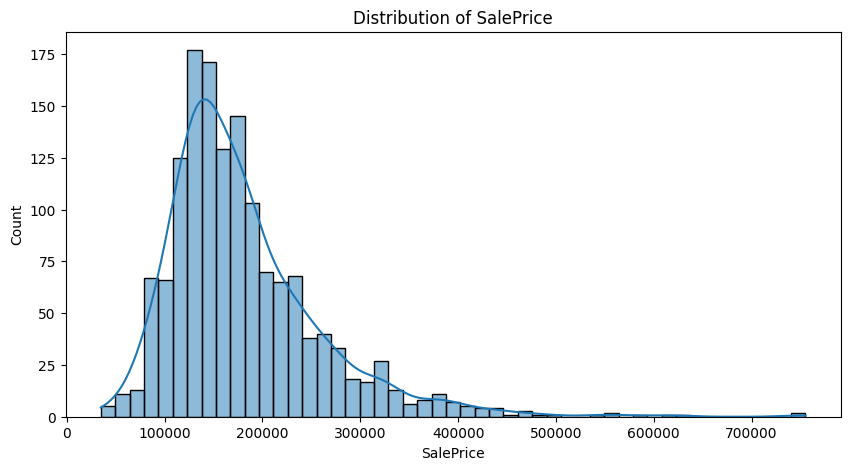

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(target, kde = True)
plt.title('Distribution of SalePrice')
plt.show()


### Skewness and Kurtosis of 'SalePrice' Variable

Now we calculate the skewness and kurtosis of the 'SalePrice' variable.

- **Skewness**: Skewness measures the asymmetry of the distribution of a variable around its mean. 
  - A skewness value of 0 indicates a symmetric distribution.
  - A negative skewness value indicates a left-skewed (long left tail) distribution.
  - A positive skewness value indicates a right-skewed (long right tail) distribution.
- **Kurtosis**: Kurtosis measures the tailedness or peakedness of a distribution compared to a normal distribution.
  - A kurtosis value of 3 indicates a normal distribution (mesokurtic).
  - A kurtosis value greater than 3 indicates heavier tails (leptokurtic).
  - A kurtosis value less than 3 indicates lighter tails (platykurtic).
  
  
  
- **Skewness**: The skewness of 'SalePrice' is approximately 1.88, indicating a positive skew. The distribution is skewed to the right, with a tail extending towards higher values.
- **Kurtosis**: The kurtosis of 'SalePrice' is approximately 6.54, indicating heavy-tailedness compared to a normal distribution. The distribution has a higher peak and heavier tails than a normal distribution.

The positive skewness implies that the majority of house prices are concentrated on the lower end, with relatively fewer high-priced houses. To address the skewness and make the distribution more symmetric, we can apply a log transformation.

Before proceeding with normalization, exploring the correlation between variables is essential to understand the relationships within the dataset.


In [20]:
#Lets Calculate Skewness and kurtosis of the 'SalePrice' variable

saleprice_skewness = target.skew()
saleprice_kurtosis = target.kurtosis()

#Now we print them
print("Skewness of 'SalePrice':", saleprice_skewness)
print("Kurtosis of 'SalePrice':", saleprice_kurtosis)

Skewness of 'SalePrice': 1.8828757597682129
Kurtosis of 'SalePrice': 6.536281860064529


### Correlation Matrix with Target Variable (SalePrice)

In this code snippet, we perform the following tasks:

1. **Separating Numeric Features**: We select only the numeric features from the dataset using the `select_dtypes()` function.
2. **Calculating Correlation**: We calculate the correlation matrix between the numeric features and the target variable 'SalePrice' using the `corrwith()` function.
3. **Creating Correlation DataFrame**: The correlation values are stored in a DataFrame called `correlation_df`.
4. **Creating a Correlation Heatmap**: We create a heatmap visualization of the correlation matrix using Seaborn's `heatmap()` function. The heatmap visualizes the correlation coefficients between numeric features and 'SalePrice'.
5. **Selecting Categorical Features**: We also select the categorical features from the dataset using the `select_dtypes()` function.

Insight:
The heatmap provides insights into the relationships between numeric features and the target variable 'SalePrice'. Features with higher correlation coefficients (either positive or negative) are more strongly associated with 'SalePrice', indicating their potential significance in predicting house prices.


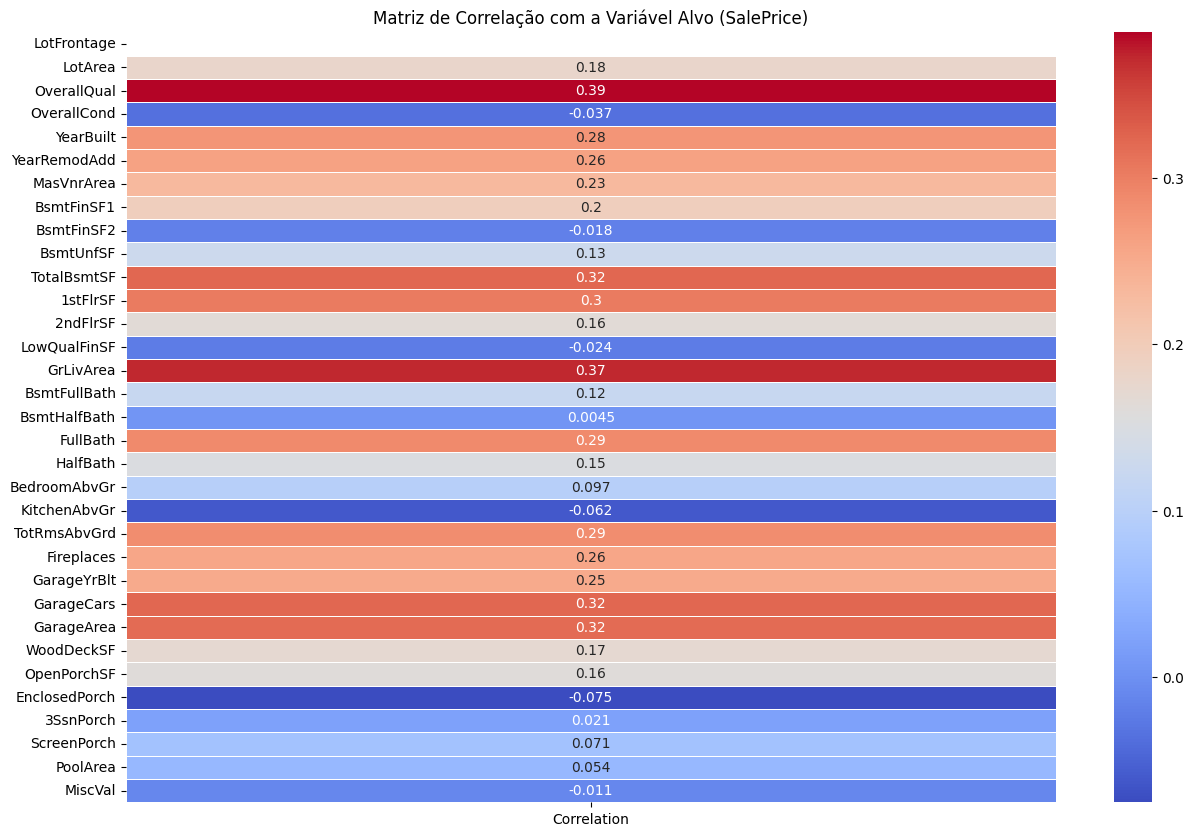

In [21]:
# Separar as características numéricas
numeric_df = train_test.select_dtypes(include=[np.number])

# Calcular a matriz de correlação entre as características numéricas e a variável alvo
correlation_with_target = numeric_df.corrwith(target)

# Transformar a série em um DataFrame com uma única coluna
correlation_df = pd.DataFrame(correlation_with_target, columns=['Correlation'])

# Criar uma máscara para o triângulo superior da matriz de correlação
mask = np.triu(np.ones_like(correlation_df, dtype=bool))

# Configurar a figura do matplotlib
plt.figure(figsize=(15, 10))

# Criar um mapa de calor para a matriz de correlação
sns.heatmap(correlation_df, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Matriz de Correlação com a Variável Alvo (SalePrice)')
plt.show()

# Selecionar as características categóricas
categorical_df = train_test.select_dtypes(include=[object])


### Relationship between Target Variable and Selected Features

In this code snippet, we analyze the relationship between the target variable 'SalePrice' and selected features:

1. **Selected Variables**: We define a list of variables (`variaveis`) that we want to analyze, including 'OverallQual', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', and 'YearRemodAdd'.

2. **Setting Figure Size**: We configure the size of the figure to accommodate multiple subplots.

3. **Creating Subplots**: We create subplots for each selected variable using a loop. Each subplot displays a scatter plot showing the relationship between the target variable ('SalePrice') and the corresponding feature.

4. **Scatter Plot Visualization**: For each variable, we create a scatter plot using Seaborn's `scatterplot()` function, plotting the variable on the x-axis and the target variable on the y-axis.

5. **Title Addition**: We add titles to each subplot to indicate the relationship being visualized.

Insight:
The scatter plots allow us to visually inspect the relationship between the target variable ('SalePrice') and each selected feature. By observing the patterns in the scatter plots, we can gain insights into how these features influence house prices.


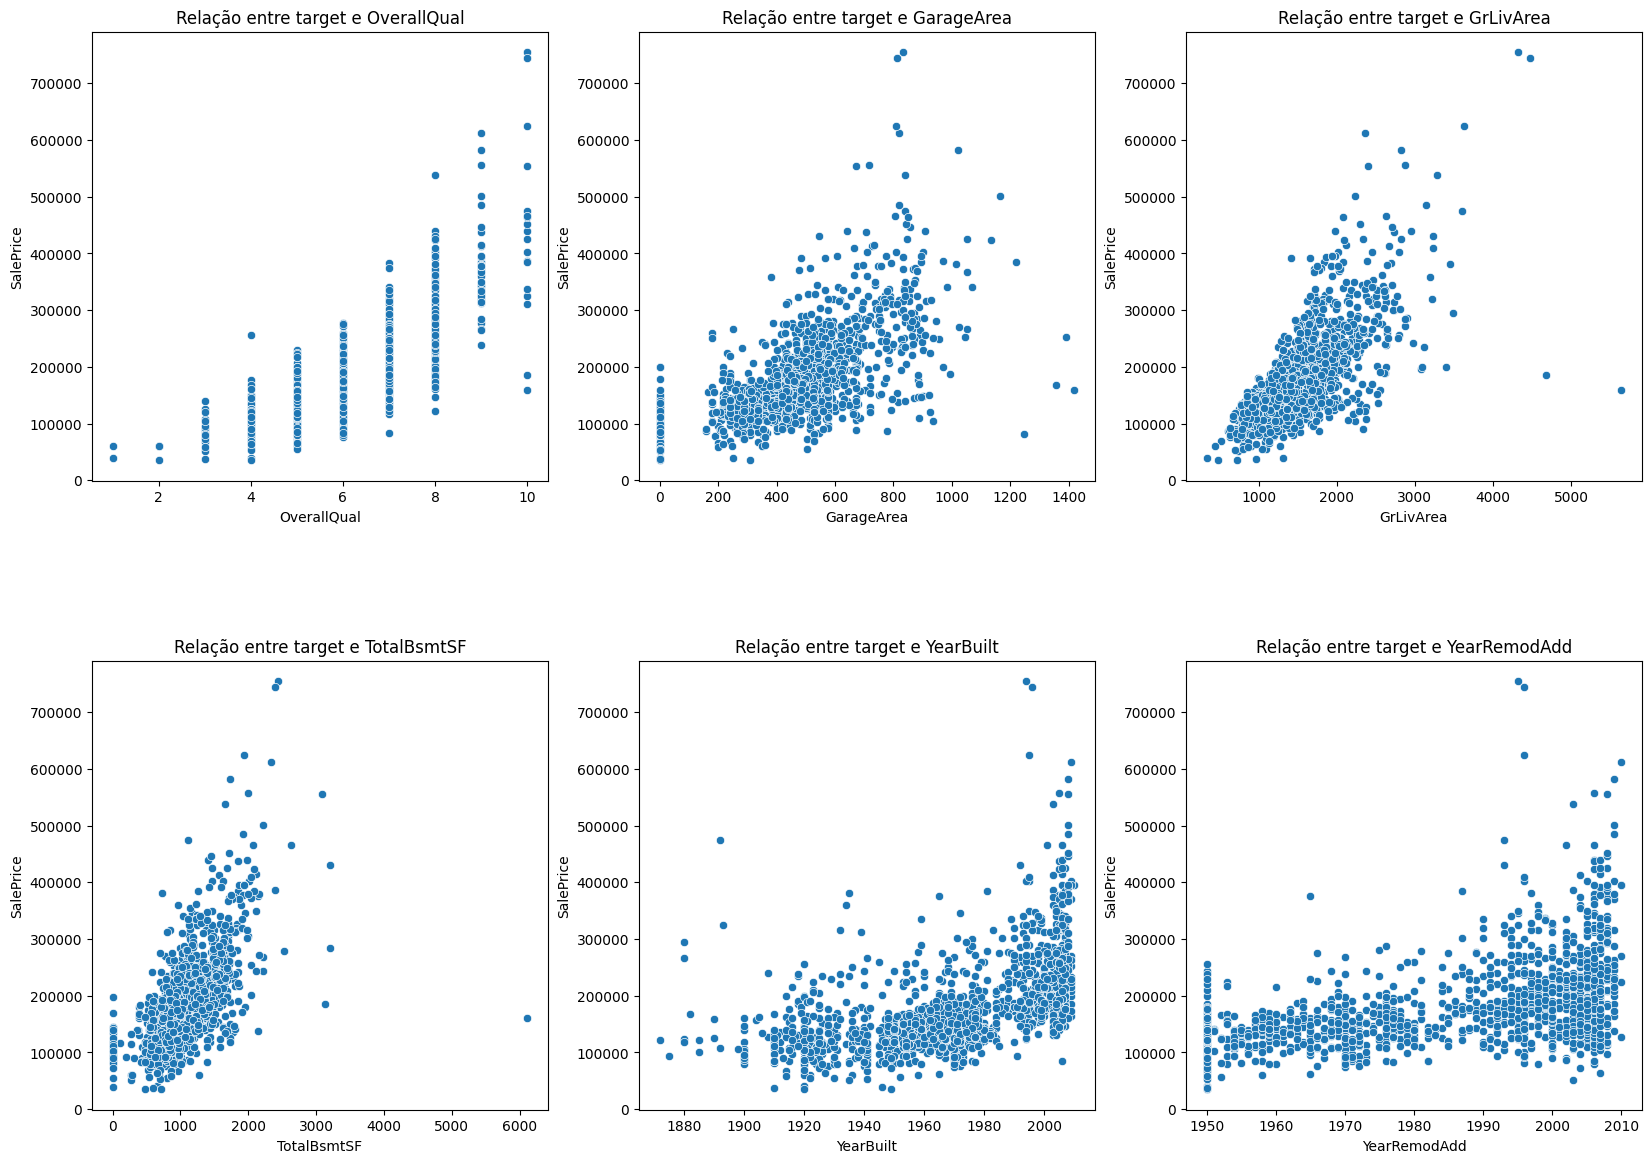

In [22]:
# Variáveis que queremos analisar
variaveis = ['OverallQual', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']

# Configurar o tamanho da figura
plt.figure(figsize=(20, 14))
plt.subplots_adjust(hspace=0.4)

# Um gráfico para cada variável
for i, var in enumerate(variaveis):
    plt.subplot(2, 3, i+1)
    
    # Criar o gráfico de dispersão apenas para as linhas do conjunto de treinamento
    sns.scatterplot(data=train_test.iloc[:len(target)], x=var, y=target)
    
    # Adicionar título ao gráfico
    plt.title(f'Relação entre target e {var}')
    
# Mostrar os gráficos
plt.show()

### Median SalePrice vs Selected Features

Here we analyze the relationship between the median sale price ('SalePrice') and selected features:

1. **Selected Variables**: We define a list of variables (`variables`) that we want to analyze, including 'OverallQual', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', and 'YearRemodAdd'.

2. **Setting Figure Size**: We configure the size of the figure to accommodate multiple subplots.

3. **Creating Subplots**: We create subplots for each selected variable using a loop. Each subplot displays a line plot showing the median sale price versus the corresponding feature.

4. **Median Calculation**: For each variable, we group the data by the variable and calculate the median 'SalePrice'.

5. **Line Plot Visualization**: We create a line plot for each variable using Matplotlib's `plot()` function, where the x-axis represents the values of the variable, and the y-axis represents the median sale price.

6. **Title and Axis Labels**: We add titles to each subplot to indicate the relationship being visualized. We also label the x-axis with the variable name and the y-axis with 'Median SalePrice'.

Insight:
In the context of the variables YearBuilt and YearRemodAdd, it's crucial to observe the strength of correlations with other key variables. This gives us insights into how the year of construction and remodeling relate to other property attributes, potentially influencing the sale price.


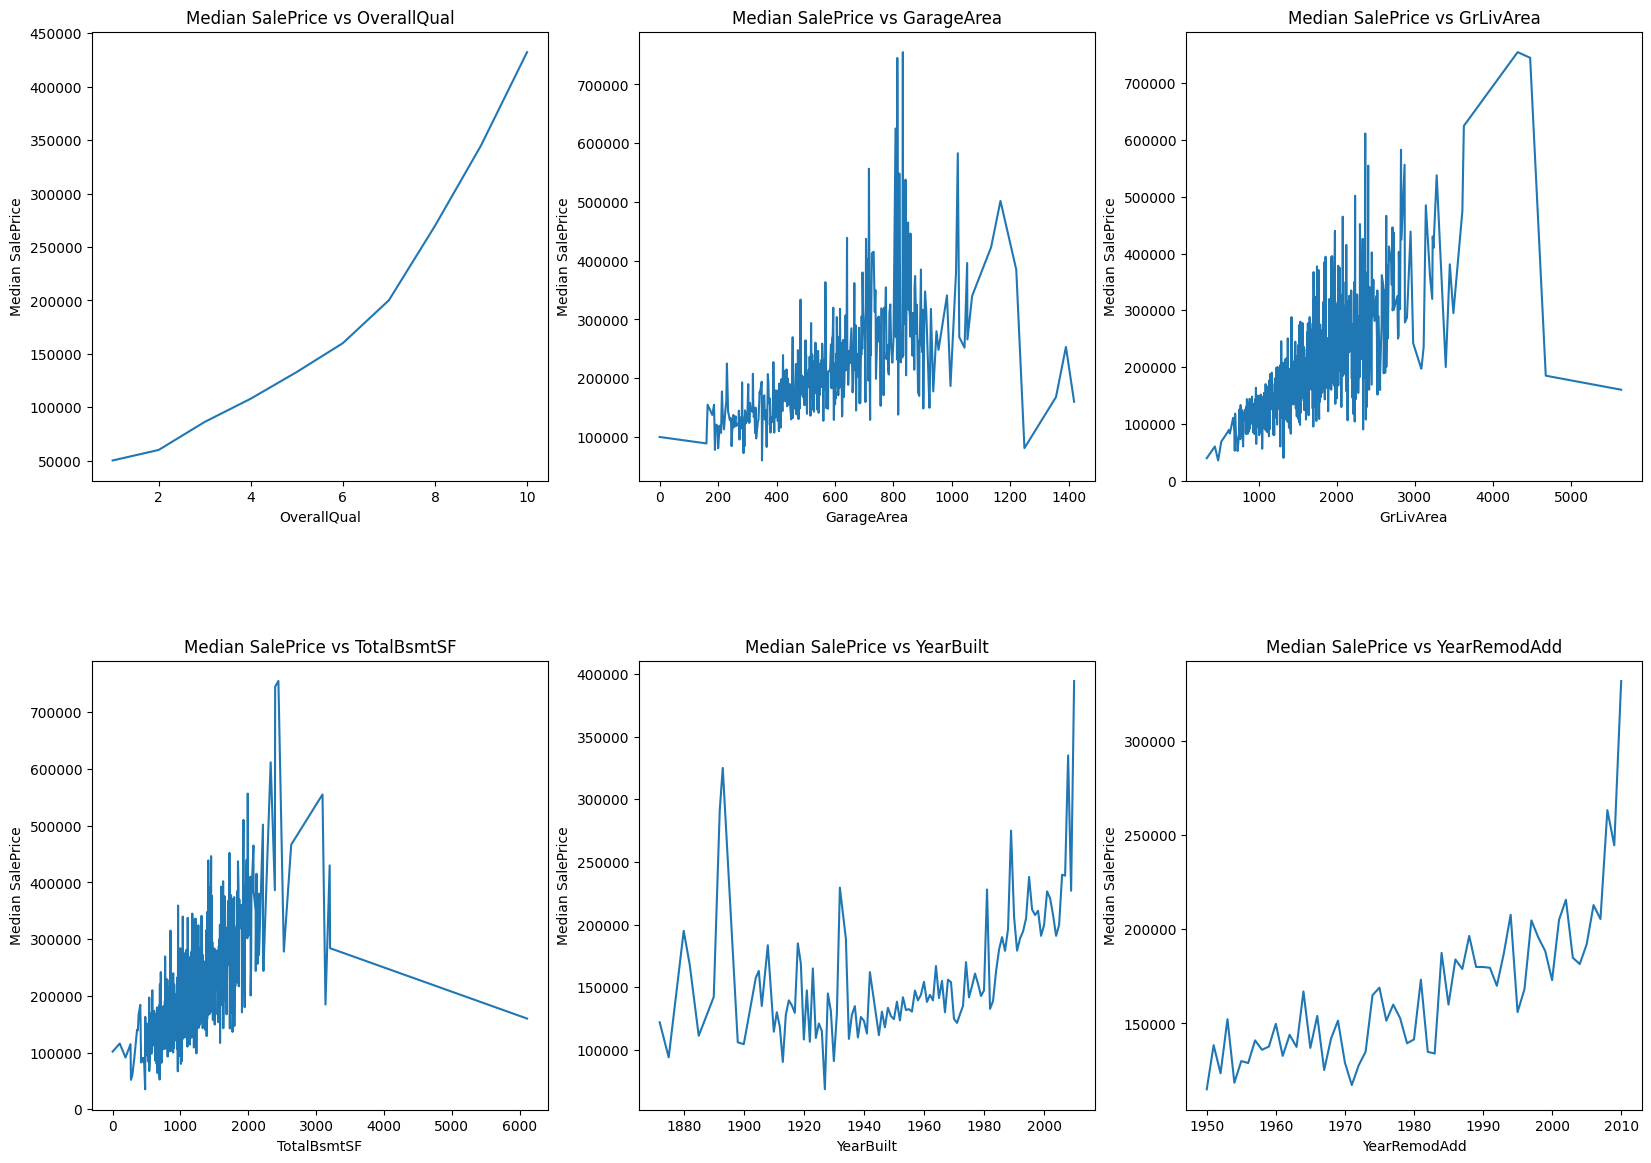

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Variáveis que queremos analisar
variables = ['OverallQual', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']

# Configurar o tamanho da figura
plt.figure(figsize=(20, 14))
plt.subplots_adjust(hspace=0.4)

# Um gráfico para cada variável
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)  # Ajustado para 2 linhas e 3 colunas
    
    # Agrupar os dados por variável e calcular a mediana de 'SalePrice'
    data = train_df.groupby(var)['SalePrice'].median()
    
    # Criar um gráfico de linha
    plt.plot(data.index, data.values)
    
    # Adicionar título ao gráfico
    plt.title(f'Median SalePrice vs {var}')
    plt.xlabel(var)
    plt.ylabel('Median SalePrice')

# Mostrar os gráficos
plt.show()

### Discrete Features vs SalePrice

In this code snippet, we analyze the relationship between discrete features and the median sale price ('SalePrice'):

1. **Identifying Discrete Features**: We identify discrete features from the numeric features in the dataset. Discrete features are those with a small number of unique values, typically less than 25.

2. **Concatenating Data**: We concatenate the `train_test` and `target` datasets to facilitate grouping by feature.

3. **Setting Figure Size**: We configure the size of the figure to accommodate multiple subplots.

4. **Creating Subplots**: We create subplots for each discrete feature using a loop. Each subplot displays a bar plot showing the median sale price versus the unique values of the corresponding feature.

5. **Median Calculation**: For each discrete feature, we group the data by the feature and calculate the median 'SalePrice'.

6. **Bar Plot Visualization**: We create a bar plot for each feature using Matplotlib's `bar()` function. Each bar represents the median sale price corresponding to a unique value of the feature.

Insight:
The bar plots provide insights into how different discrete features relate to the median sale price. Understanding these relationships can help identify influential features in predicting house prices and guide feature selection or engineering strategies.


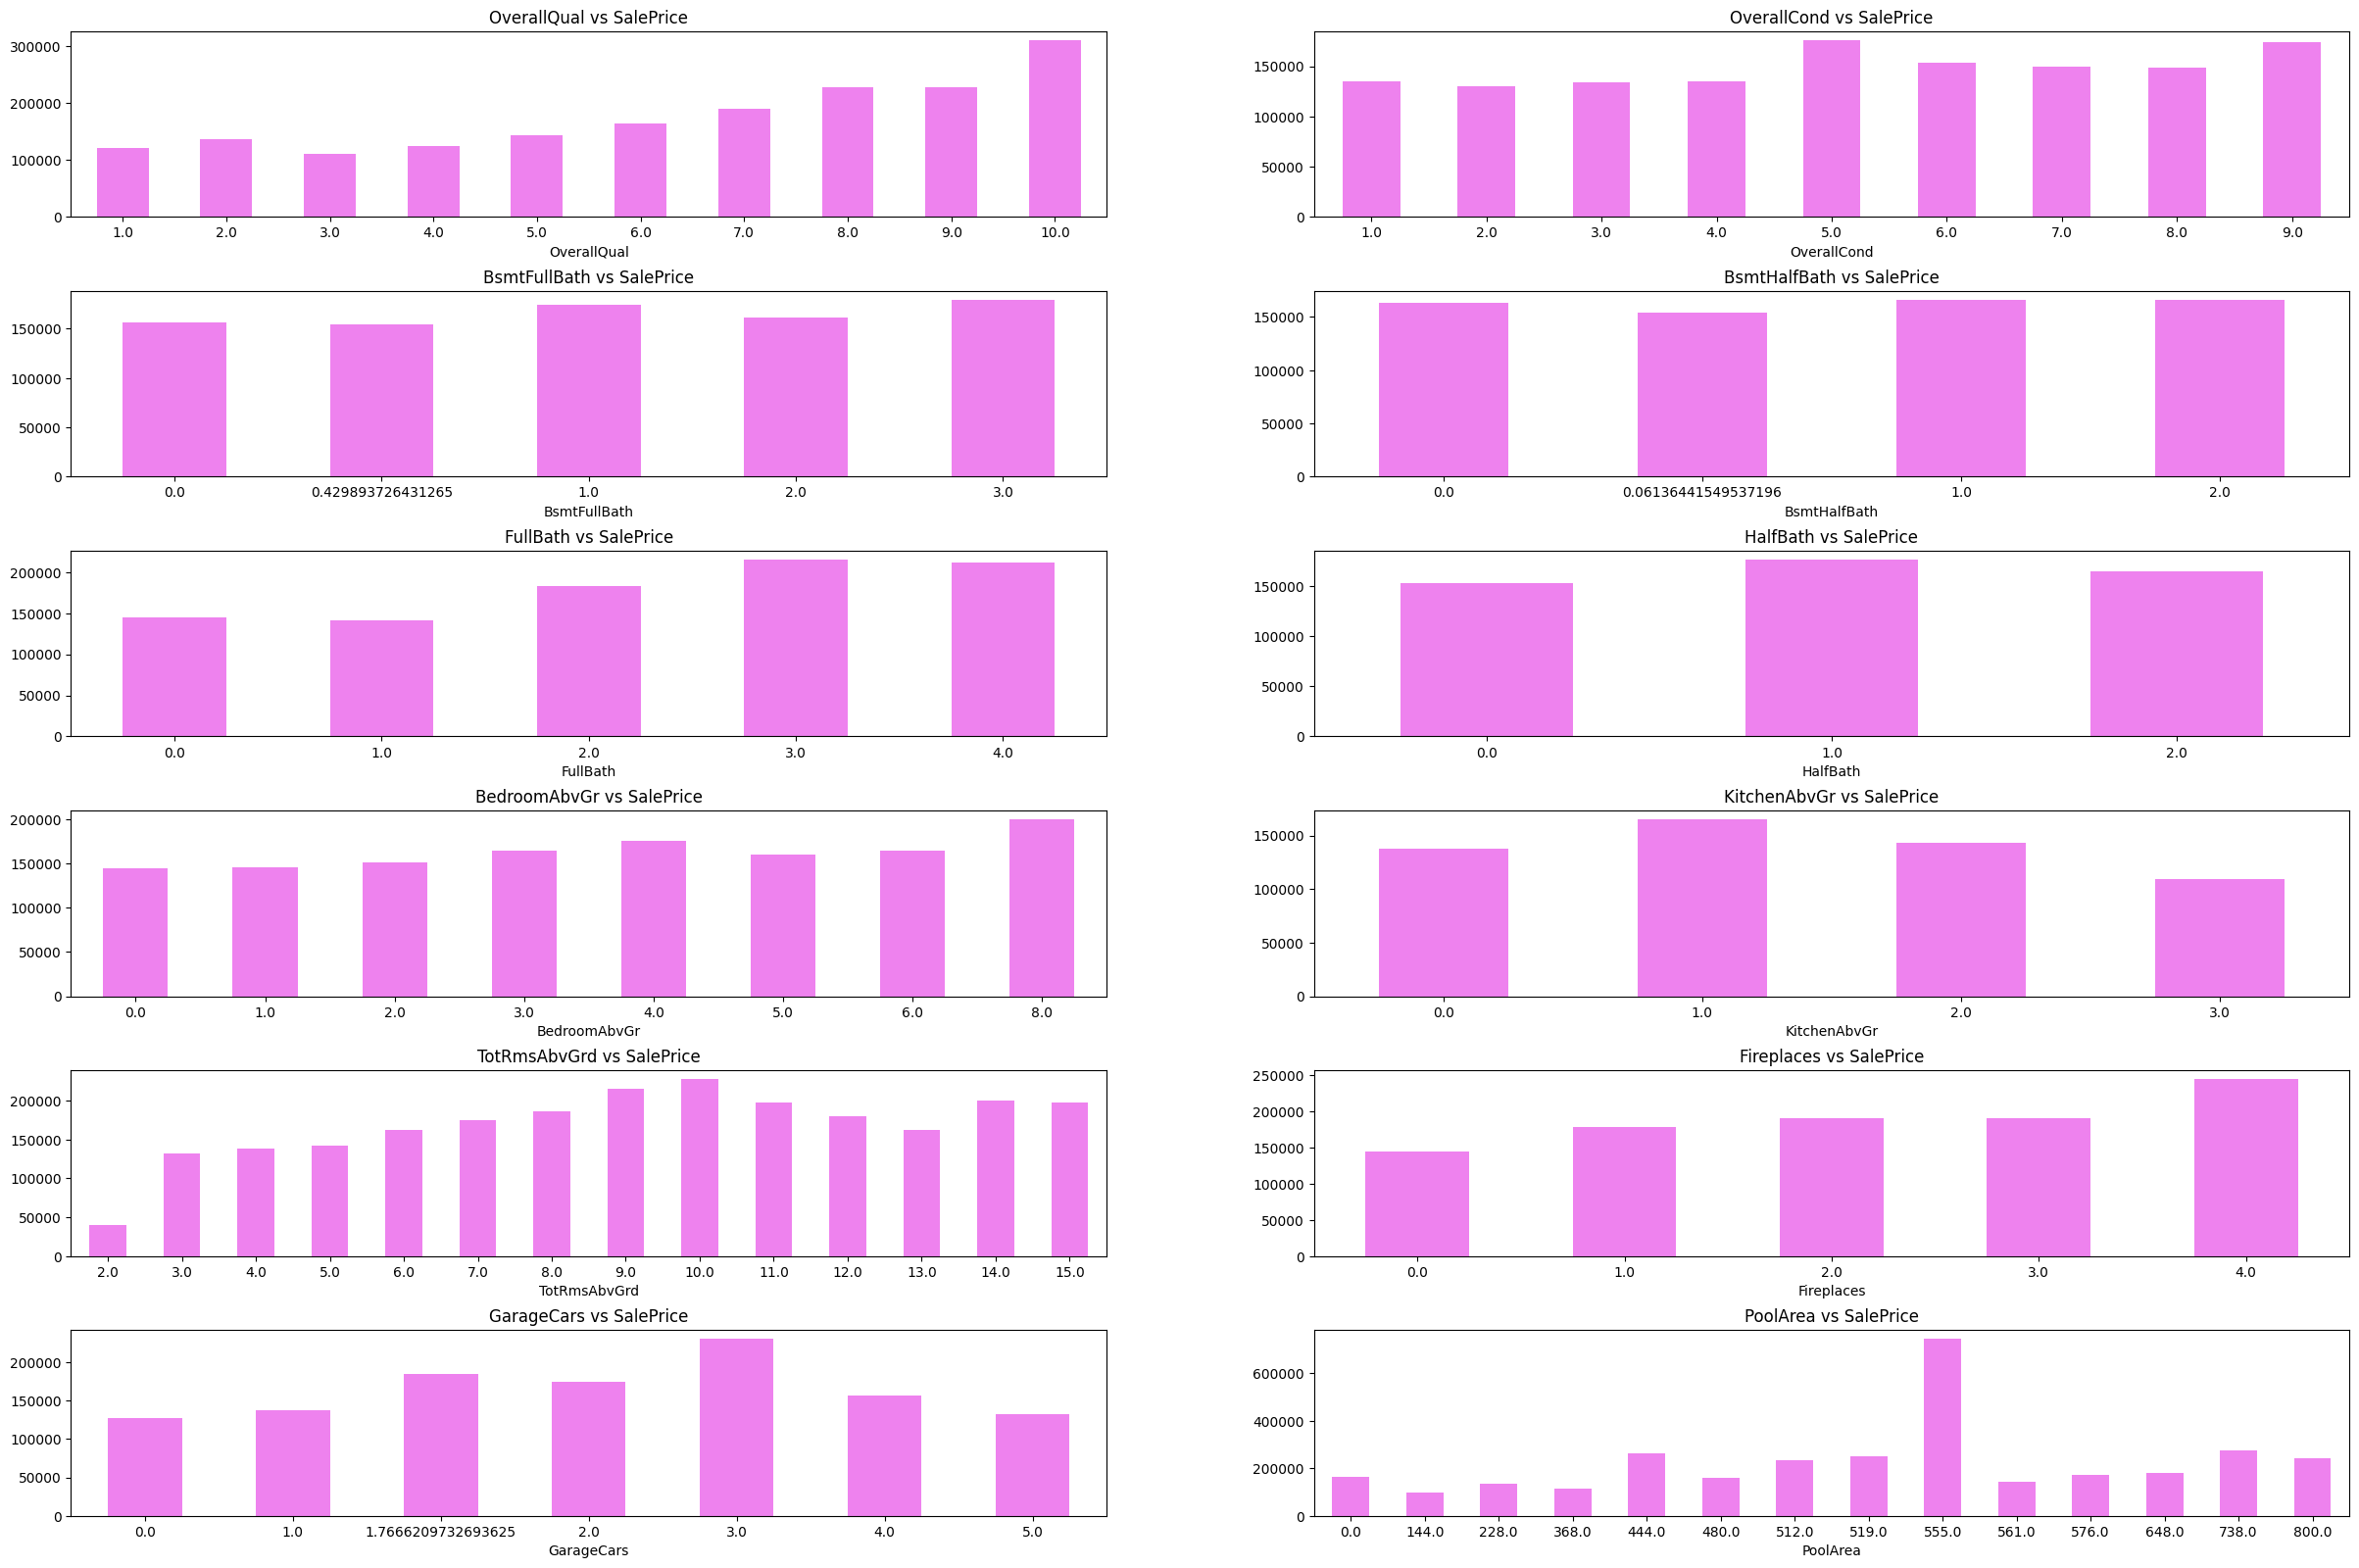

In [24]:
from scipy.stats import skew, kurtosis

numeric_features = train_test.select_dtypes(include=[np.number])

discrete_features = numeric_features.columns[numeric_features.nunique() < 25]

# Concatenar train_test e target para facilitar o agrupamento
data = pd.concat([train_test, target], axis=1)

plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.4)

row = 9
col = 2

for i, feature in enumerate(list(discrete_features), 1):
    plt.subplot(row, col, i)
    
    # Agrupar os dados por característica e calcular a mediana de 'SalePrice'
    data.groupby(feature)['SalePrice'].median().plot.bar(color="violet", rot=0)
    
    plt.title(f'{feature} vs SalePrice')

plt.show()

### Histograms of Continuous Features

In this code snippet, we analyze the distribution of continuous features in the dataset:

1. **Identifying Continuous Features**: We identify continuous features by excluding discrete features and columns related to years ('Year' or 'Yr') from the list of numeric features.

2. **Calculating the Number of Continuous Features**: After filtering, we find that there are 18 continuous features in the dataset.

3. **Setting Figure Size**: We configure the size of the figure to accommodate multiple subplots.

4. **Creating Subplots**: We create subplots for each continuous feature using a loop. Each subplot displays a histogram showing the distribution of values for the corresponding feature.

5. **Histogram Visualization**: For each continuous feature, we create a histogram using Matplotlib's `hist()` function. The histogram represents the frequency distribution of values within the feature.

Insight:
Upon reviewing the continuous features, it’s clear that many exhibit a significant right skew, with most values concentrated on the lower end of the scale. Interestingly, ‘SalePrice’ is the only feature that closely resembles a normal distribution. 


In [25]:
year_columns = [col for col in train_test.columns if 'Year' in col or 'Yr' in col]
print(year_columns)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [26]:
continuous_features = [feature for feature in numeric_features if feature not in list(discrete_features) + list(year_columns)]
len(continuous_features)

18

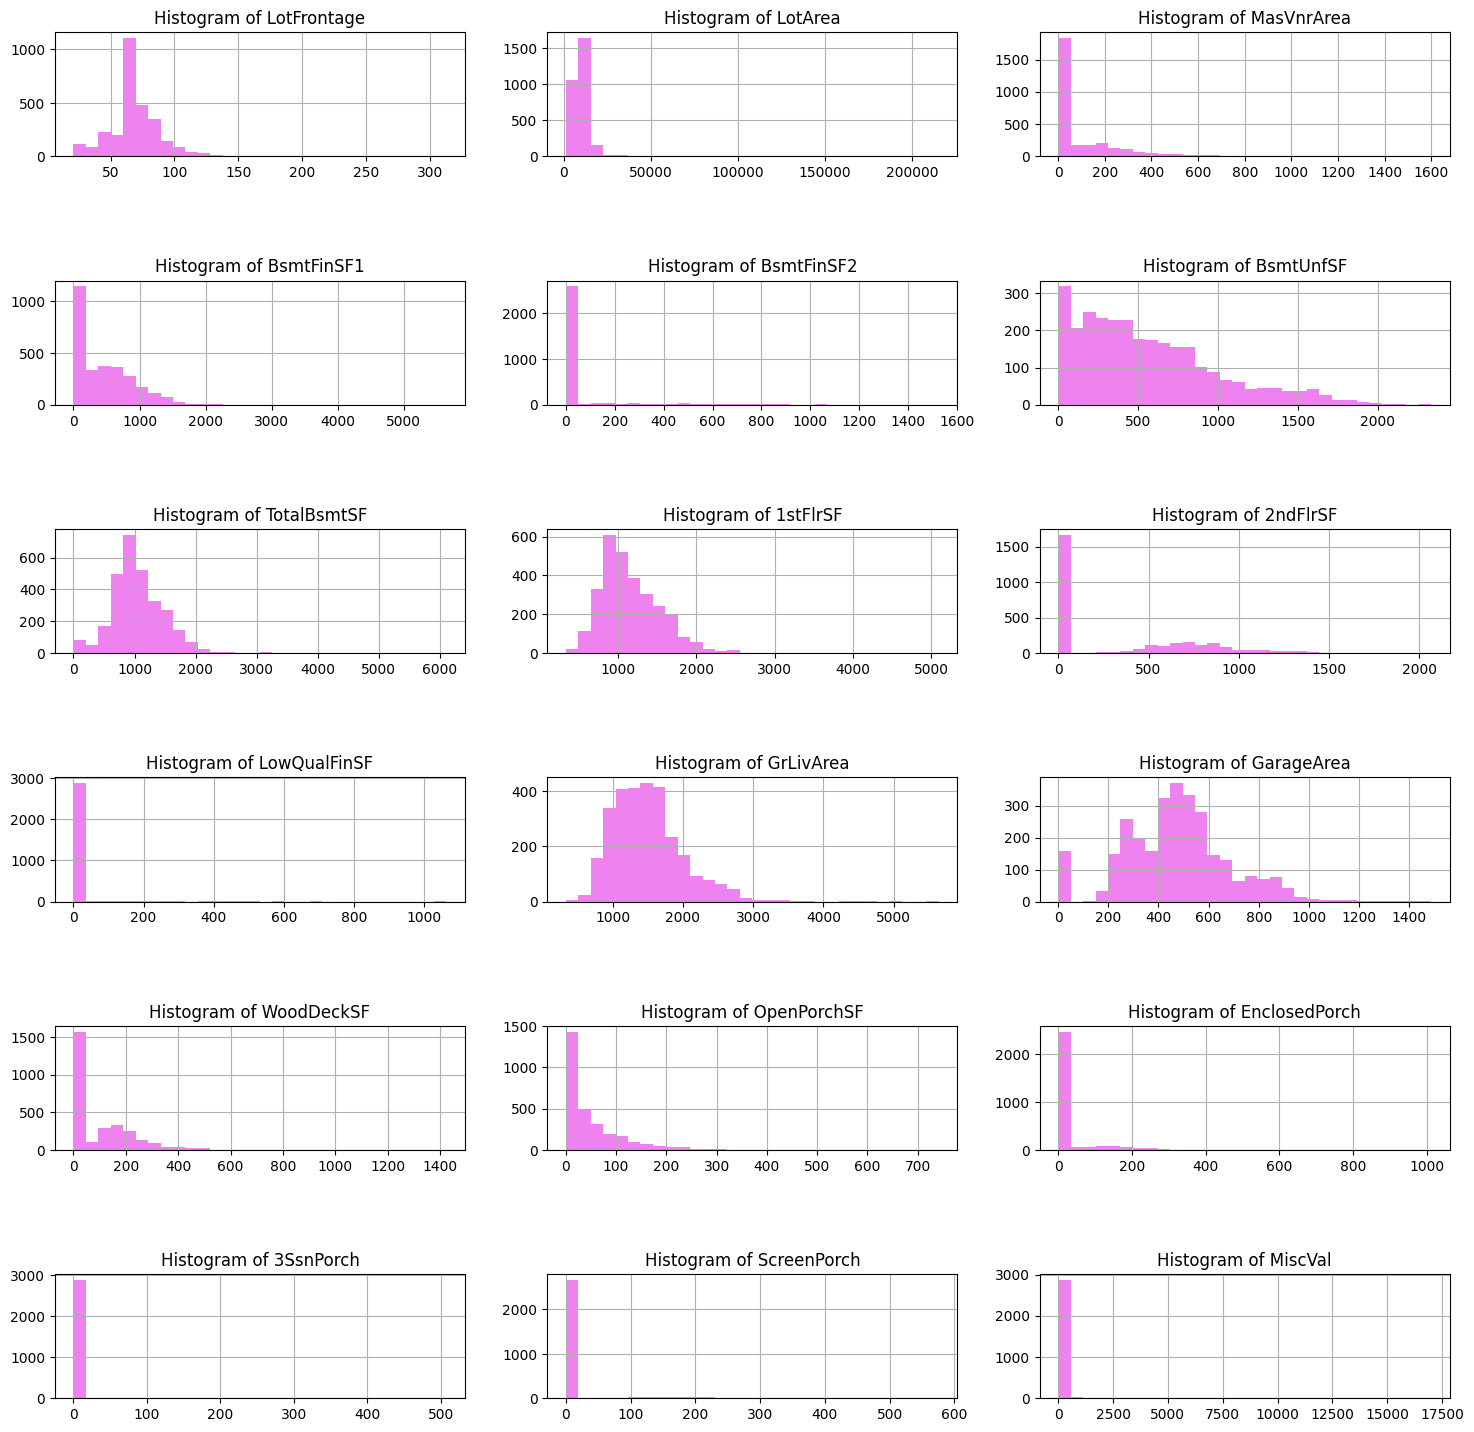

In [27]:
plt.figure(figsize=(18,50))
plt.subplots_adjust(hspace = 1)

row = 16
col = 3

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(row, col, i)
    
    #create an histogram for each continous feature
    train_test[feature].hist(bins = 30, color = "violet")
    
    plt.title(f'Histogram of {feature}')
    
plt.show()

## Feature engineering

####  Here we create new variables based on existing features in the dataset:

- 'SqFtPerRoom': We calculate the square feet per room by dividing the living area ('GrLivArea') by the total number of rooms above ground ('TotRmsAbvGrd'), plus the number of full bathrooms ('FullBath'), half bathrooms ('HalfBath'), and kitchens above ground ('KitchenAbvGr').

- 'Total_Home_Quality': Represents the sum of the overall quality of the house ('OverallQual') with the overall condition ('OverallCond').

- 'Total_Bathrooms': Refers to the total number of bathrooms in the house, including full bathrooms, half bathrooms, full bathrooms in the basement, and half bathrooms in the basement.

- 'HighQualSF': Represents the sum of the above-ground area ('GrLivArea'), first-floor area ('1stFlrSF'), second-floor area ('2ndFlrSF'), half of the garage area ('GarageArea'), half of the basement area ('TotalBsmtSF'), and masonry veneer area ('MasVnrArea').

- 'Age': Calculates the age of the house by subtracting the year sold ('YrSold') from the year built ('YearBuilt').

- 'Renovate': Represents the time in years between the year of remodeling ('YearRemodAdd') and the year built ('YearBuilt').


In [28]:
# Vamos criar novos recursos
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["GrLivArea"]+train_test["1stFlrSF"] + train_test["2ndFlrSF"]+0.5*train_test["GarageArea"]+0.5*train_test["TotalBsmtSF"]+1*train_test["MasVnrArea"]

train_test["Age"] = pd.to_numeric(train_test["YrSold"])-pd.to_numeric(train_test["YearBuilt"])

train_test["Renovate"] = pd.to_numeric(train_test["YearRemodAdd"])-pd.to_numeric(train_test["YearBuilt"])

train_test.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF,Age,Renovate
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2.0,2008.0,WD,Normal,142.500000,12.0,3.5,4318.0,5.0,0.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5.0,2007.0,WD,Normal,140.222222,14.0,2.5,3385.0,31.0,0.0


### Creation of Dummy Variables and Normalization of Skewed Features

Here we are performing two important data preprocessing steps:

#### Creation of Dummy Variables

The function `pd.get_dummies()` is used to convert categorical variables into dummy or indicator variables. This means that each distinct value in a categorical column is transformed into a new binary column (0 or 1), indicating the presence or absence of that value in a particular sample.

#### Normalization of Skewed Features

Normalization is an essential step in data preprocessing, especially when dealing with skewed features. Skewness in the data can negatively impact the performance of machine learning models.

- First, we identify the numeric features in the DataFrame `dataset_df` using `dataset_df.dtypes[dataset_df.dtypes != object].index`.
- Next, we calculate the skewness coefficient for each numeric feature using the `skew()` function.
- We sort the features with high skewness coefficient (greater than 0.5) in descending order.
- We apply the logarithmic transformation (using `np.log1p()`) to features with high skewness coefficient, which helps reduce skewness in the data.

These steps prepare the data for better modeling, mitigating the adverse effects of skewness and ensuring that categorical variables are properly handled during analysis.


In [29]:
# Verificar e tratar valores infinitos
train_test.replace([np.inf, -np.inf], np.nan, inplace=True)  # Substituir infinitos por NaN ou outro valor

# Verificar e tratar valores NaN
train_test.fillna(0, inplace=True)  # Preencher valores NaN com 0 ou outro valor apropriado

# Verificar se há NaN após as operações
if train_test.isna().sum().any():
    print("Há valores NaN no DataFrame.")
else:
    print("Não há valores NaN no DataFrame.")  # Verificar se ainda há valores NaN após o tratamento

# Normalização de características enviesadas
numeric_features = train_test.dtypes[train_test.dtypes != object].index
skewed_features = train_test[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    train_test[i] = np.log1p(train_test[i])

Não há valores NaN no DataFrame.


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Histograms of New Features

In this code snippet, we visualize histograms for newly created features in the dataset:

1. **Printing the DataFrame Head**: We display the first few rows of the dataset to ensure the presence of new features.

2. **List of New Features**: We define a list named `new_features` containing the names of the newly created variables.

3. **Setting Figure Size**: We set the size of the figure to accommodate multiple subplots for each new feature.

4. **Creating Subplots**: Using Matplotlib's `subplot()` function, we create individual subplots for each new feature in the dataset.

5. **Histogram Creation**: For each new feature, we generate a histogram using the `hist()` function. The histograms visualize the distribution of values within each new feature.

6. **Title Setting**: We set titles for each subplot indicating the name of the corresponding new feature.

7. **Displaying the Plots**: Finally, we display the histograms of the new features.

These histograms provide insights into the distribution and spread of values within the newly created features, aiding in further analysis and modeling.


  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0       60.0       RL     4.189655  9.042040   Pave      Reg         Lvl   
1       20.0       RL     4.394449  9.169623   Pave      Reg         Lvl   
2       60.0       RL     4.234107  9.328212   Pave      IR1         Lvl   
3       70.0       RL     4.110874  9.164401   Pave      IR1         Lvl   
4       60.0       RL     4.442651  9.565284   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... MoSold  YrSold SaleType SaleCondition  \
0    AllPub    Inside       Gtl  ...    2.0  2008.0       WD        Normal   
1    AllPub       FR2       Gtl  ...    5.0  2007.0       WD        Normal   
2    AllPub    Inside       Gtl  ...    9.0  2008.0       WD        Normal   
3    AllPub    Corner       Gtl  ...    2.0  2006.0       WD       Abnorml   
4    AllPub       FR2       Gtl  ...   12.0  2008.0       WD        Normal   

  SqFtPerRoom  Total_Home_Quality  Total_Bathrooms  HighQualSF       Age  

ValueError: supplied range of [-inf, 4.919980925828125] is not finite

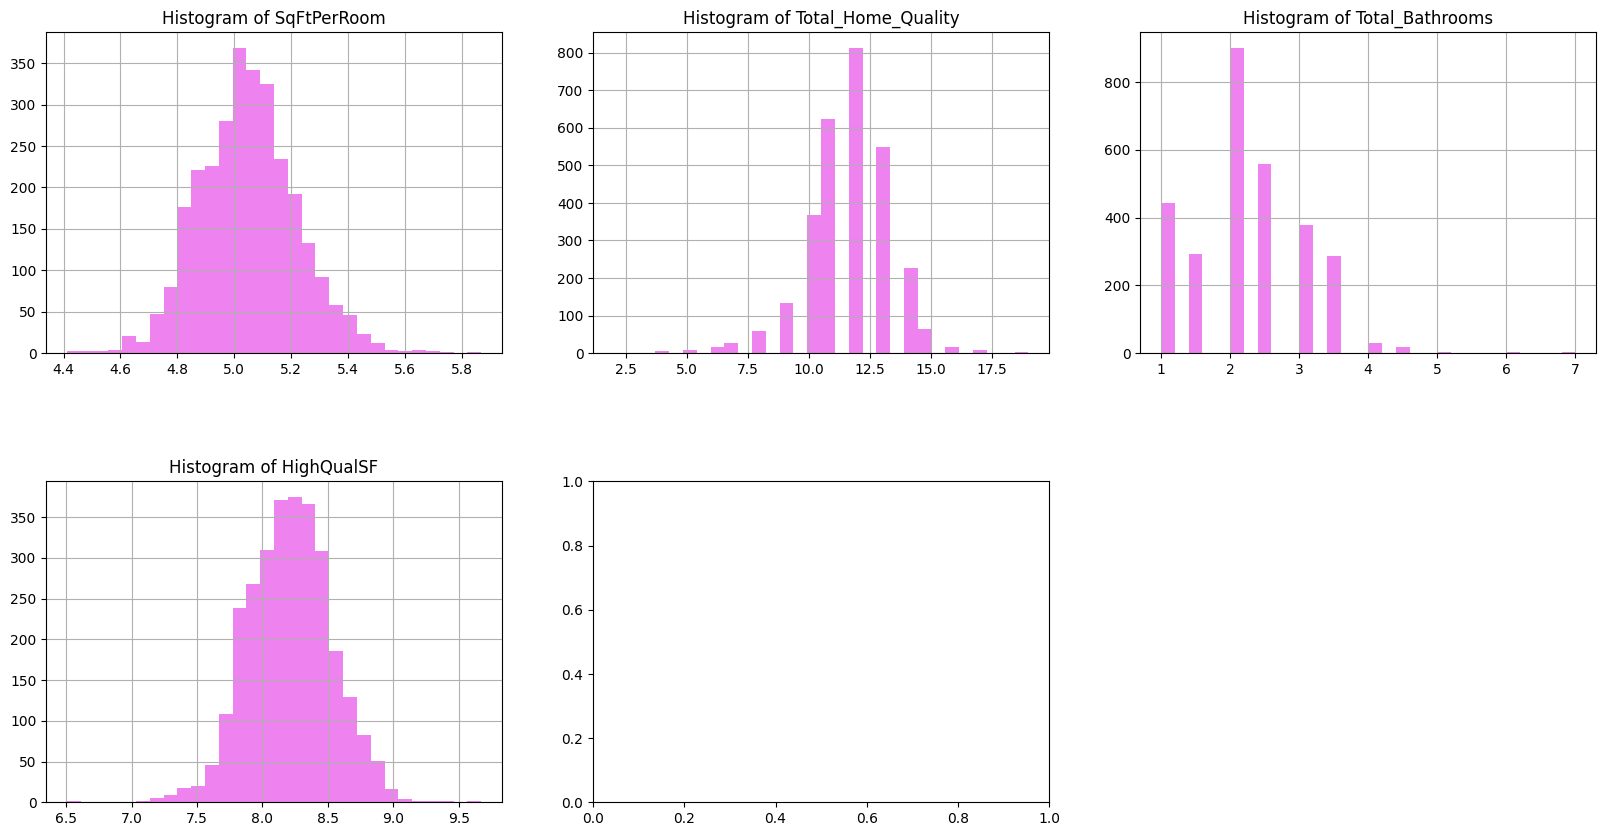

In [30]:
# V
print(train_test.head())

# Lista das novas variáveis que criamos
new_features = ['SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'HighQualSF', 'Age', 'Renovate']

# Configurar o tamanho da figura
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

# Criar um histograma para cada nova variável
for i, feature in enumerate(new_features):
    plt.subplot(2, 3, i+1)
    train_test[feature].hist(bins=30, color="violet")
    plt.title(f'Histogram of {feature}')

# Mostrar os gráficos
plt.show()

### Logarithmic Transformation

Here we apply a logarithmic transformation to the target variable `SalePrice`:

1. **Logarithmic Transformation**: We use NumPy's `log1p()` function to apply a logarithmic transformation to the target variable. This transformation helps in stabilizing the variance and making the distribution more symmetrical.

2. **Distribution Plot**: After applying the logarithmic transformation, we plot the distribution of the transformed `SalePrice` variable using Seaborn's `histplot()` function. The plot includes a kernel density estimation (KDE) curve to visualize the distribution's shape.

3. **Title Setting**: We set the title of the plot as "Distribution of SalePrice" to describe the content of the visualization.

This transformation is commonly used to address issues of skewness and heteroscedasticity in the target variable, making it more suitable for regression analysis and modeling.


In [ ]:
# Aplicar transformação logarítmica
target = np.log1p(target)

# Plotar a distribuição
plt.figure(figsize=(10, 5))
sns.histplot(target, kde = True)
plt.title('Distribution of SalePrice')
plt.show()

## Modeling

### Modeling

Above we perform the following steps for modeling:

1. **Obtaining Training and Test Sets**: We split the combined dataset (`train_test`) back into the original training set (`X`) and the test set (`X_test`). We use the shape of the original training features to determine the split.

2. **Converting Categorical Variables to Dummy Variables**: We convert categorical variables into dummy variables using pandas' `get_dummies()` function. This process creates binary columns representing the categories of each categorical variable.

3. **Aligning Training and Test Sets**: We align the columns of the training and test sets to ensure they have the same features. This step is crucial for consistency during modeling.

4. **Imputing Missing Values**: We initialize a `SimpleImputer` and use it to fill missing values in both the training and test sets. The strategy chosen is to replace missing values with the mean of the respective column.

5. **Checking Dimensions**: We print the dimensions of the training set (`X`), target variable (`target`), and test set (`X_test`) to verify the data shapes before modeling.


In [ ]:
from sklearn.impute import SimpleImputer

# Obter o número de linhas no conjunto de treinamento original
n_train = train_features.shape[0]

# Recriar o conjunto de treinamento
X = train_test.iloc[:n_train, :]

# Recriar o conjunto de teste
X_test = train_test.iloc[n_train:, :]

# Converter as variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

# Alinhar os conjuntos de treinamento e teste para terem as mesmas colunas
X, X_test = X.align(X_test, join='left', axis=1)

# Inicializar o imputer
imputer = SimpleImputer(strategy='mean')

# Preencher os valores NaN nos conjuntos de treinamento e teste
X = imputer.fit_transform(X)
X_test = imputer.transform(X_test)

# Verificar as dimensões
print(X.shape, target.shape, X_test.shape)

### Cross-Validation of Regression Models

Performing cross-validation of various regression models using k-fold cross-validation with 10 folds.

#### Model Selection and Initialization
We initialize several regression models, including Linear Regression, Bayesian Ridge Regression, LightGBM Regression, Support Vector Regression (SVR), Decision Tree Regression, Random Forest Regression, XGBoost Regression, Gradient Boosting Regression, CatBoost Regression, and a Stacked Regressor.

#### Cross-Validation Process
For each model, we perform the following steps:
1. **Model Initialization**: Initialize the specific regression model based on the model name.
2. **Cross-Validation RMSE**: Calculate the root mean squared error (RMSE) using k-fold cross-validation.
3. **Average RMSE and Standard Deviation**: Compute the average RMSE and standard deviation of RMSE across all folds.
4. **Result Storage**: Store the average RMSE and standard deviation in lists for further analysis.

#### Results and Storage
After cross-validation of all models, we create a DataFrame to store the cross-validation results, including the model names, average RMSE, and standard deviation of RMSE. The results are saved to a CSV file named 'resultados_validacao_cruzada.csv' for future reference.

The cross-validation process helps assess the performance and generalization ability of each regression model on unseen data, guiding the selection of the most suitable model for the regression task.


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, BayesianRidge
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb

# Definir o número de folds para validação cruzada
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Lista de modelos de regressão de base
baseline_models = ['Linear_Reg.', 'Bayesian_Ridge_Reg.', 'LGBM_Reg.', 'SVR',
                   'Dec_Tree_Reg.', 'Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.', 'Cat_Boost_Reg.', 'Stacked_Reg.']

# Listas para armazenar os resultados da validação cruzada
cv_scores = []
cv_std = []

# Definir a função cv_rmse
def cv_rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse

# Inicializar os modelos e realizar a validação cruzada
for model_name in baseline_models:
    print(f"Avaliando o modelo: {model_name}")
    
    if model_name == 'Linear_Reg.':
        model = LinearRegression()
    elif model_name == 'Bayesian_Ridge_Reg.':
        model = BayesianRidge(compute_score=True)
    elif model_name == 'LGBM_Reg.':
        model = LGBMRegressor(objective='regression')
    elif model_name == 'SVR':
        model = SVR()
    elif model_name == 'Dec_Tree_Reg.':
        model = DecisionTreeRegressor()
    elif model_name == 'Random_Forest_Reg.':
        model = RandomForestRegressor()
    elif model_name == 'XGB_Reg.':
        model = xgb.XGBRegressor(verbosity=0)  # Configurando a verbosidade do XGBoost
    elif model_name == 'Grad_Boost_Reg.':
        model = GradientBoostingRegressor()
    elif model_name == 'Cat_Boost_Reg.':
        model = CatBoostRegressor(verbose=False)  # Configurando a verbosidade do CatBoost
    elif model_name == 'Stacked_Reg.':
        estimators = [
            ('catboost', CatBoostRegressor(verbose=False)),
            ('linear', LinearRegression()),
            ('bayesian_ridge', BayesianRidge()),
            ('gradient_boosting', GradientBoostingRegressor())
        ]
        model = StackingRegressor(estimators=estimators,
                                  final_estimator=CatBoostRegressor(verbose=False),
                                  passthrough=True)
    
    # Calcular o RMSE médio e o desvio padrão utilizando a validação cruzada
    score = cv_rmse(model, X, target)
    cv_scores.append(score.mean())
    cv_std.append(score.std())

    print(f"RMSE médio: {score.mean()}")
    print(f"Desvio padrão do RMSE: {score.std()}")

# Criar um DataFrame para armazenar os resultados da validação cruzada
final_cv_score = pd.DataFrame(baseline_models, columns=['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

# Salvar os resultados em um arquivo de texto
final_cv_score.to_csv('resultados_validacao_cruzada.csv', index=False)

print("Resultados da validação cruzada salvos em 'resultados_validacao_cruzada.csv'.")



The `final_cv_score` DataFrame contains the results of cross-validation for different regression models:

The table presents the average RMSE (Root Mean Squared Error) and the standard deviation of RMSE obtained through cross-validation for each regression model. Lower RMSE values indicate better model performance in predicting the target variable.


In [ ]:
final_cv_score

The bar plot above illustrates the average RMSE (Root Mean Squared Error) obtained through cross-validation for different regression models:

- The x-axis represents the regression models.
- The y-axis represents the mean RMSE obtained from cross-validation.

The plot provides a visual comparison of the performance of various regression models in predicting the target variable. Lower RMSE values indicate better predictive performance. From the visualization, it's evident that "Cat_Boost_Reg." and "Stacked_Reg." models have relatively lower average RMSE compared to other models.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o tamanho da figura
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras com os resultados da validação cruzada
sns.barplot(x='Regressors', y='RMSE_mean', data=final_cv_score)

# Adiciona rótulos aos eixos x e y
plt.xlabel('Regressores', fontsize=12)
plt.ylabel('CV_Mean_RMSE', fontsize=12)

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()


Fitting of various regression models to the training data and the creation of a blended prediction function.

- XGBRegressor, GradientBoostingRegressor, LinearRegression, BayesianRidge, LGBMRegressor, SVR, DecisionTreeRegressor, RandomForestRegressor, and StackingRegressor models are trained using the training data (X) and target variable (target).

- A blending approach is implemented to combine predictions from multiple models. The `blended_predictions` function blends predictions from different models using weighted averages. Each model contributes to the final prediction with a specific weight, determined empirically or through optimization techniques.

The blending technique aims to leverage the strengths of different models and mitigate their weaknesses, leading to potentially improved predictive performance.


In [ ]:
import xgboost as xgb

# Ajustar o XGBRegressor aos dados
xgb_reg = xgb.XGBRegressor(verbosity=0).fit(X, target)

# Ajustar os outros modelos aos dados
gradient_boosting_reg = GradientBoostingRegressor().fit(X, target)
linear_reg = LinearRegression().fit(X, target)
bayesian_ridge = BayesianRidge(compute_score=True).fit(X, target)
lgbm_reg = LGBMRegressor(objective='regression').fit(X, target)
svr = SVR().fit(X, target)
dec_tree_reg = DecisionTreeRegressor().fit(X, target)
random_forest_reg = RandomForestRegressor().fit(X, target)
stacked_reg = StackingRegressor(estimators=[
    ('catboost', CatBoostRegressor(verbose=False)),
    ('linear', LinearRegression()),
    ('bayesian_ridge', BayesianRidge()),
    ('gradient_boosting', GradientBoostingRegressor())],
    final_estimator=CatBoostRegressor(verbose=False),
    passthrough=True).fit(X, target)

# Função para fazer previsões misturadas
def blended_predictions(X):
    return ((0.1 * linear_reg.predict(X)) + \
            (0.1 * bayesian_ridge.predict(X)) + \
            (0.1 * lgbm_reg.predict(X)) + \
            (0.1 * svr.predict(X)) + \
            (0.1 * dec_tree_reg.predict(X)) + \
            (0.05 * random_forest_reg.predict(X)) + \
            (0.1 * gradient_boosting_reg.predict(X)) + \
            (0.1 * xgb_reg.predict(X)) + \
            (0.25 * stacked_reg.predict(X)))


Calculating the Root Mean Squared Log Error (RMSLE) score on the training data using predictions generated by the blended prediction function.

- The predictions are made on the training data using the `blended_predictions` function, which combines predictions from multiple regression models.

- The RMSLE metric is calculated using the `mean_squared_log_error` function from Scikit-Learn's metrics module. RMSLE is a logarithmic transformation of the Root Mean Squared Error (RMSE), commonly used when the target variable has a wide range of values. It penalizes underestimates more than overestimates, making it suitable for skewed target distributions.

- The calculated RMSLE score is printed to the console, providing insight into the performance of the blended model on the training data.


In [ ]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Fazer previsões nos dados de treinamento
train_predictions = blended_predictions(X)

# Calcular o RMSLE
rmsle = np.sqrt(mean_squared_log_error(target, train_predictions))

print(f"RMSLE score on train data: {rmsle}")

Performing predictions on the test data using the blended prediction function and prepares the predictions for submission.

- **Making Predictions on Test Data**: The `blended_predictions` function is used to generate predictions on the test data.

- **Converting Predictions to Original Scale**: Since the target variable was transformed using `np.log1p()` during preprocessing, the predictions are converted back to the original scale using `np.expm1()`.

- **Reading Test Data**: The test data is read from the CSV file located at "../input/house-prices-advanced-regression-techniques/test.csv".

- **Extracting IDs**: The IDs of the test data are extracted to associate predictions with corresponding IDs.

- **Creating Output DataFrame**: A DataFrame named 'output' is created to store the IDs and corresponding sale price predictions.

- **Saving Predictions**: The predictions are saved to a CSV file named "submission_regression.csv" using the `to_csv()` function.

- **Printing Preview**: The first few rows of the output DataFrame containing ID and predicted sale price are printed to verify the format.

- **Confirmation Message**: A confirmation message is printed indicating that the predictions on the test set have been completed and saved successfully.


In [ ]:
# Fazer previsões nos dados de teste
test_predictions = blended_predictions(X_test)

# Converter as previsões de volta para a escala original
test_predictions = np.expm1(test_predictions)

# Ler o arquivo de teste
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)

# Extrair os IDs dos dados de teste
ids = test_data['Id']

# Criar um DataFrame com os IDs e as previsões
output = pd.DataFrame({'Id': ids, 'SalePrice': test_predictions})

# Salvar as previsões em um arquivo CSV
output.to_csv("submission_regression.csv", index=False)

# Imprimir as primeiras linhas do DataFrame de previsões com o ID e o preço
print(output.head())  
print("Previsões no conjunto de teste concluídas e salvas com sucesso!")

Predictions on the test data using the blended prediction function and prepares the predictions for submission.

- **Making Predictions on Test Data**: The `blended_predictions` function is used to generate predictions on the test data.

- **Converting Predictions to Original Scale**: Since the target variable was transformed using `np.log1p()` during preprocessing, the predictions are converted back to the original scale using `np.expm1()`.

- **Reading the Sample Submission File**: The sample submission file, which contains the required format for submission, is read from the specified path.

- **Replacing SalePrice Column**: The 'SalePrice' column in the sample submission DataFrame is replaced with the predictions generated by the model.

- **Saving the Submission**: The updated submission DataFrame is saved to a CSV file named "submission.csv" using the `to_csv()` function with the parameter `index=False` to exclude the index from the saved file.

- **Printing Preview**: The first few rows of the submission DataFrame are printed to verify the format and content of the submission file.


In [ ]:
# Fazer previsões nos dados de teste
test_predictions = blended_predictions(X_test)

# Converter as previsões de volta para a escala original
test_predictions = np.expm1(test_predictions)

# Ler o arquivo de submissão de exemplo
sample_submission12_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

# Substituir a coluna 'SalePrice' pelas previsões do modelo
sample_submission12_df['SalePrice'] = test_predictions

# Salvar a submissão em um arquivo CSV
sample_submission12_df.to_csv('/kaggle/working/submission.csv', index=False)

# Imprimir as primeiras linhas do DataFrame de submissão
print(sample_submission12_df.head())